In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
df=pd.read_csv('Video_Games.csv')
df

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,Tecmo Koei,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16715,LMA Manager 2007,X360,2006.0,Sports,Codemasters,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16716,Haitaka no Psychedelica,PSV,2016.0,Adventure,Idea Factory,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
16717,Spirits & Spells,GBA,2003.0,Platform,Wanadoo,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       10015 non-null  object 
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(9), object(7)
memory usage: 2.0+ MB


In [4]:
df.isna().sum()

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
Publisher            54
NA_Sales              0
EU_Sales              0
JP_Sales              0
Other_Sales           0
Global_Sales          0
Critic_Score       8582
Critic_Count       8582
User_Score         6704
User_Count         9129
Developer          6623
Rating             6769
dtype: int64

### Data Preproccessing

In [5]:
df['Rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [6]:
#Since Rating column contains missing values we will be filling the nan values with mode since it holds categorical data
mode = df['Rating'].mode()
mode


0    E
Name: Rating, dtype: object

In [7]:
#The mode of rating is 'E' , so all the missing values for rating getting filled with rating 'E'
df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_9644\3621687434.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Rating'].fillna(df['Rating'].mode()[0], inplace=True)


In [8]:
df['Year_of_Release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000.,   nan, 1995., 1991., 1981., 1987.,
       1980., 1983., 2020., 2017.])

In [9]:
#The Year_of_Release has floating values and also nan.
#Will be replacing the nan with median and convert the datatype to int
df['Year_of_Release'].fillna(df['Year_of_Release'].median(), inplace=True)

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_9644\2932702654.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Year_of_Release'].fillna(df['Year_of_Release'].median(), inplace=True)


In [10]:
df['Year_of_Release']=df['Year_of_Release'].astype(int)

In [11]:
#There are two rows where the name genre and other columns are null, the two rows will be dropped.
df.dropna(subset=['Name', 'Genre'], inplace=True)

In [12]:
#Filling the Publisher null values with "Unknown"
df['Publisher'].fillna('Unknown', inplace=True)

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_9644\3671252938.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Publisher'].fillna('Unknown', inplace=True)


In [13]:
#Filling the null values in  Developer column with mode. There are 1697 unique values which are of categorical type.
print(len(df['Developer'].unique()))
df['Developer'].unique()
df['Developer'].fillna(df['Developer'].mode()[0], inplace=True)


1697


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_9644\1121291888.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Developer'].fillna(df['Developer'].mode()[0], inplace=True)


In [14]:
df['User_Score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [15]:
#There is inconsistency in the data i.e., there is a  string value for User_Score column
# Replace 'tbd' with NaN
df['User_Score'] = df['User_Score'].replace('tbd', np.nan)
# Convert column to numeric (will turn non-numeric into NaN)
df['User_Score'] = pd.to_numeric(df['User_Score'], errors='coerce')

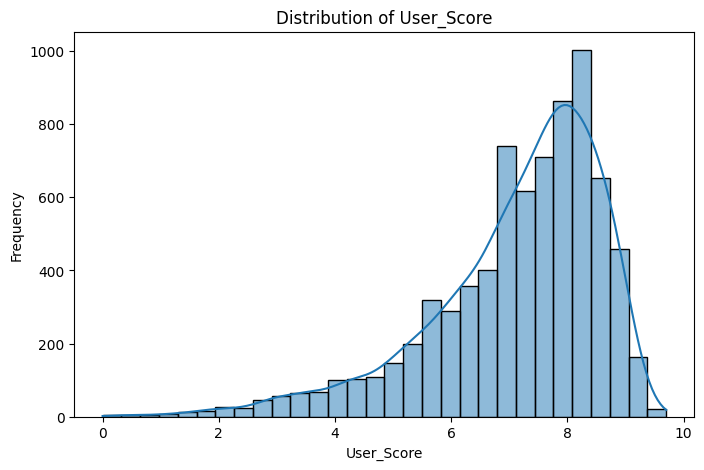

Skewness of User_Score: -1.25


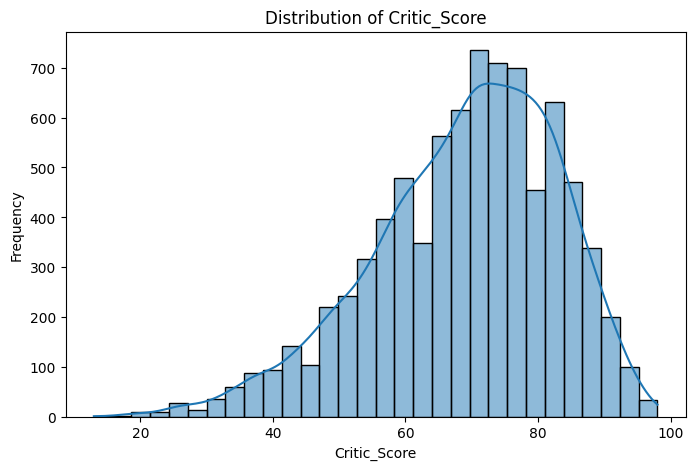

Skewness of Critic_Score: -0.61


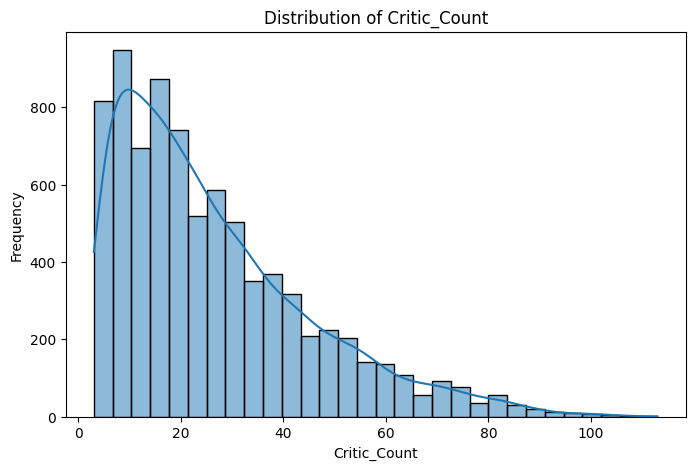

Skewness of Critic_Count: 1.15


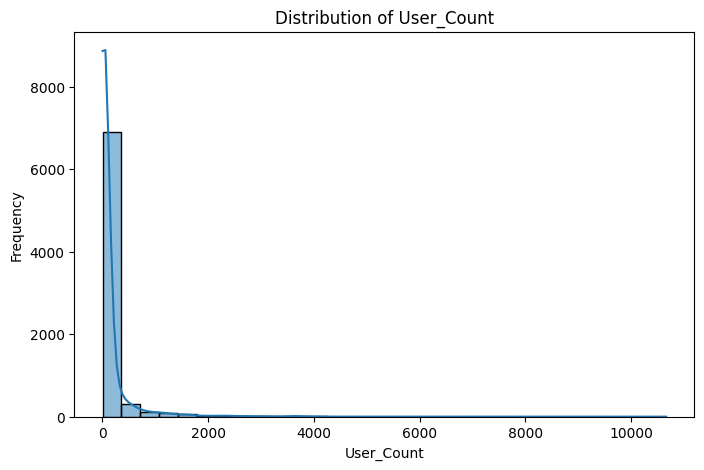

Skewness of User_Count: 9.03


In [16]:
#For the columns such as Critic_Score, Critic_Count, User_Score and User_Count we will plot and calculate the skewness and then decide on replacing the missing
#values with either Mean, median or mode
from scipy.stats import skew

# List of columns to check for skewness
columns_to_check = ['User_Score', 'Critic_Score', 'Critic_Count','User_Count']

# Visualizing histograms and calculating skewness
for col in columns_to_check:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col].dropna(), kde=True, bins=30)  # Drop NaN values for visualization
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

    # Calculate skewness
    skew_value = skew(df[col].dropna())
    print(f'Skewness of {col}: {skew_value:.2f}')

In [17]:
#From the histogram and the skewness value of -1.25, the distribution is left-skewed (negative skew), meaning that most of the User_Score values are clustered near the higher end (closer to 8).
#Median is the best option for imputing missing values in this case because:
#It is less affected by the skewness and outliers compared to the mean.
#Using the median will better reflect the central tendency of the majority of the data.
df['User_Score'].fillna(df['User_Score'].median(), inplace=True)

C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_9644\2920784698.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['User_Score'].fillna(df['User_Score'].median(), inplace=True)


In [18]:
#With a skewness of -0.61, the Critic_Score distribution is only mildly left-skewed
#Median: Since there is slight skewness, the median is generally more robust than the mean to ensure the 
#imputed value is not overly influenced by outliers.
# Fill missing Critic_Score with median
df['Critic_Score'].fillna(df['Critic_Score'].median(), inplace=True)


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_9644\2963988485.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Critic_Score'].fillna(df['Critic_Score'].median(), inplace=True)


In [19]:
#With a skewness of 1.15, the Critic_Count distribution is moderately right-skewed. In this case:
#Median: A better choice because it is robust to skewness and outliers. The mean would be pulled higher by the long tail of large values.
# Fill missing Critic_Count with median
df['Critic_Count'].fillna(df['Critic_Count'].median(), inplace=True)


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_9644\1489797137.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Critic_Count'].fillna(df['Critic_Count'].median(), inplace=True)


In [20]:
#With a skewness of 9.03, the User_Count distribution is highly right-skewed, meaning there are likely a few extremely high values compared to the rest of the data. 
#Median is the best choice to impute missing values here.
# Fill missing User_Count with median
df['User_Count'].fillna(df['User_Count'].median(), inplace=True)


C:\Users\Aishwarya\AppData\Local\Temp\ipykernel_9644\3204753191.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['User_Count'].fillna(df['User_Count'].median(), inplace=True)


In [21]:
df.isna().sum()

Name               0
Platform           0
Year_of_Release    0
Genre              0
Publisher          0
NA_Sales           0
EU_Sales           0
JP_Sales           0
Other_Sales        0
Global_Sales       0
Critic_Score       0
Critic_Count       0
User_Score         0
User_Count         0
Developer          0
Rating             0
dtype: int64

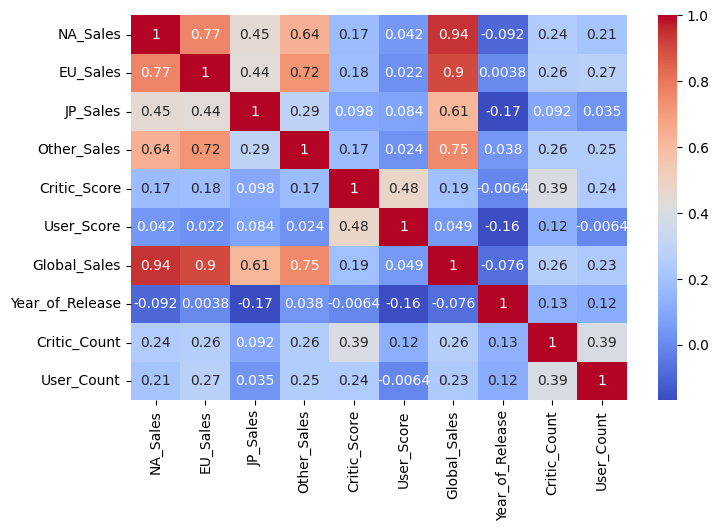

In [22]:
# Correlation matrix:
#From the correlation matrix we can find out strong positive relationship(Close to 1) between Global sales and other numeric features
plt.figure(figsize=(8, 5))
corr_matrix = df[['NA_Sales','EU_Sales','JP_Sales','Other_Sales','Critic_Score','User_Score','Global_Sales','Year_of_Release','Critic_Count','User_Count']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()


#### 1a.

##### Linear Regression

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

Performing linear regression for feature: NA_Sales
There are 13373 data points in the training set.
There are 3344 data points in the testing set.
gradient:  1.298949613181023
intercept:  0.5262013011291409


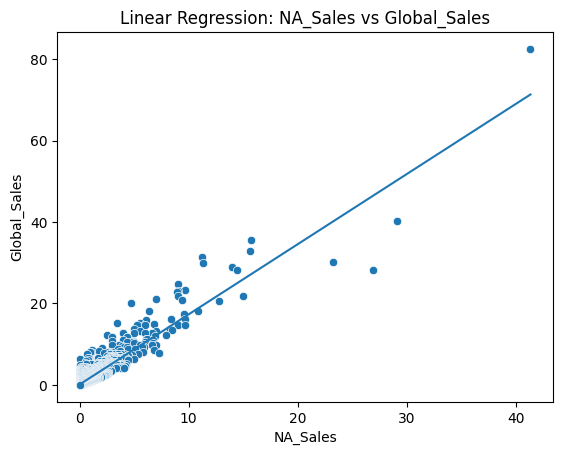

Performing linear regression for feature: EU_Sales
There are 13373 data points in the training set.
There are 3344 data points in the testing set.
gradient:  1.214339210179936
intercept:  0.5262013011291408


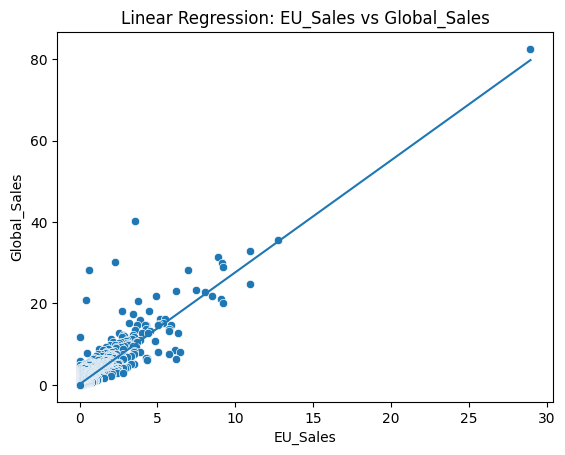

Performing linear regression for feature: JP_Sales
There are 13373 data points in the training set.
There are 3344 data points in the testing set.
gradient:  0.8894725902337676
intercept:  0.5262013011291408


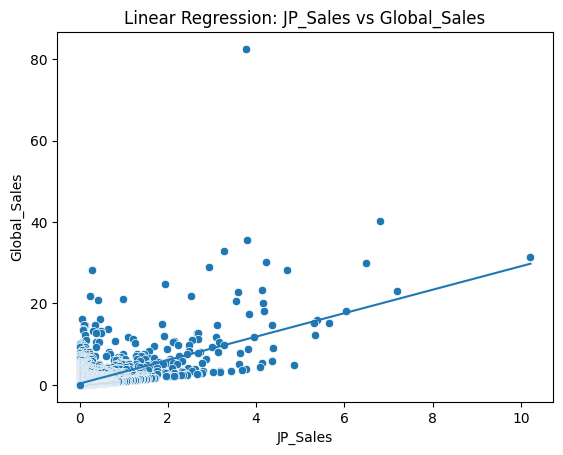

Performing linear regression for feature: Other_Sales
There are 13373 data points in the training set.
There are 3344 data points in the testing set.
gradient:  0.9479390440538877
intercept:  0.5262013011291408


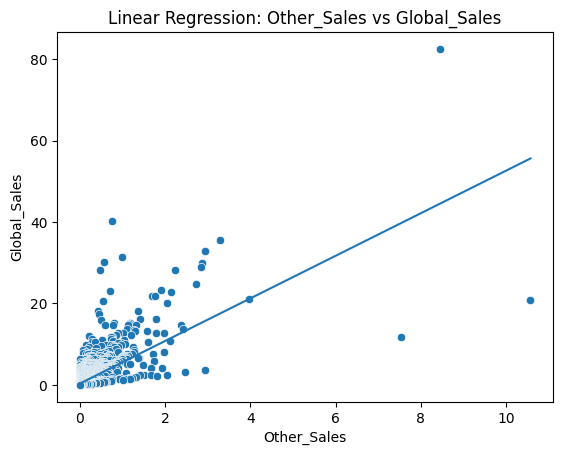

Performing linear regression for feature: User_Count
There are 13373 data points in the training set.
There are 3344 data points in the testing set.
gradient:  0.3743879673617307
intercept:  0.5262013011291408


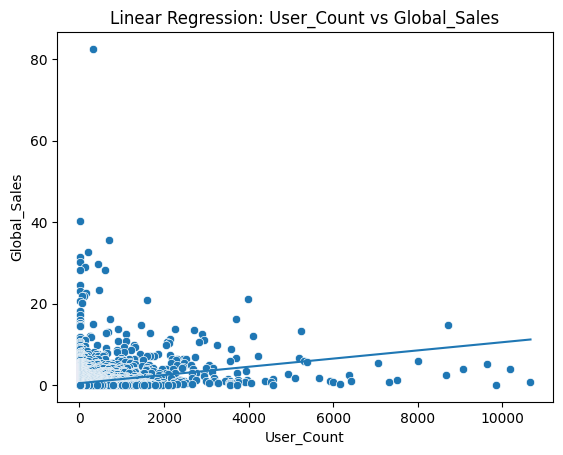

Performing linear regression for feature: User_Score
There are 13373 data points in the training set.
There are 3344 data points in the testing set.
gradient:  0.07006998101706595
intercept:  0.5262013011291409


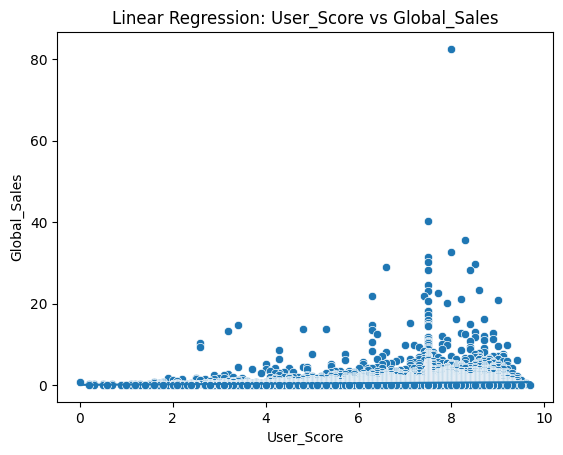

Performing linear regression for feature: Critic_Score
There are 13373 data points in the training set.
There are 3344 data points in the testing set.
gradient:  0.291508930280491
intercept:  0.5262013011291407


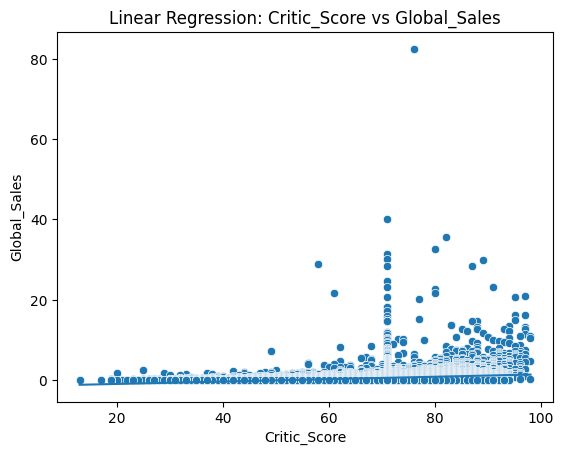

        Feature  Gradient  Intercept  Mean Absolute Error  Mean Squared Error  \
0      NA_Sales  1.298950   0.526201             0.202356            0.287345   
1      EU_Sales  1.214339   0.526201             0.238920            0.299785   
2      JP_Sales  0.889473   0.526201             0.518119            2.820534   
3   Other_Sales  0.947939   0.526201             0.343432            1.167004   
4    User_Count  0.374388   0.526201             0.579536            4.035142   
5    User_Score  0.070070   0.526201             0.611567            4.122473   
6  Critic_Score  0.291509   0.526201             0.620101            4.039832   

   Root Mean Squared Error  R2 Score  
0                 0.536046  0.930422  
1                 0.547526  0.927409  
2                 1.679444  0.317030  
3                 1.080280  0.717419  
4                 2.008766  0.022923  
5                 2.030387  0.001776  
6                 2.009933  0.021787  


In [24]:
def linear_regression(df, feature_column, target_column):
    # Extract input (x) and output (y) features
    x = df[feature_column].to_numpy().reshape(-1, 1)
    y = df[target_column]
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    # Lets check the size of the training and
    # testing sets.
    print("There are %d data points in the training set." % (len(x_train), ))
    print("There are %d data points in the testing set." % (len(x_test), ))
    from sklearn.preprocessing import StandardScaler
    # Create an instance of the StandardScaler class
    scale = StandardScaler()
    # Fit the standard scaler to the input data that
    # we have in x. This will find the mean and
    # standard deviation in x, using the training
    # dataset.
    scale.fit(x_train)
    # Now apply the standard scaler transformation
    # to both the training and the testing sets.
    x_train_scaled = scale.transform(x_train)
    x_test_scaled = scale.transform(x_test)
    # Create an instance of the model.
    games_linear = LinearRegression()
    # Fit the model to the training data.
    games_linear.fit(x_train_scaled, y_train)
    # Get the fit coefficients from the
    # best-fit model.
    gradient = games_linear.coef_[0]
    intercept = games_linear.intercept_
    # Print the coefficients.
    print("gradient: ", gradient)
    print("intercept: ", intercept)
    games_pred = games_linear.predict(x_test_scaled)
    # Calculate the mean absolute error
    mean_abs = mean_absolute_error(y_test, games_pred)
    # Calculate the mean squared error
    mean_squared = mean_squared_error(y_test, games_pred)
    # The root mean squared error is just the
    # square root of the mean squared error
    # that we calculated above.
    rms_error = np.sqrt(mean_squared)
    # Calculate the R2 score
    R2 = r2_score(y_test, games_pred)
    # Create an array of values covering the range of Global Sales. 
    #Don't forget to reshape this array so it has 2 dimensions.
    x_fit = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    # Apply the standardisation transformation using
    # the same StandardScaler that we used on the
    # training and testing data.
    x_fit_scaled = scale.transform(x_fit)
    # Apply the trained model to this scaled input array.
    # This will give us the y-values for the best-fit line.
    y_fit = games_linear.predict(x_fit_scaled)
    # Use seaborn to create a scatter plot of numerical features
    # versus Global_Sales
    sns.scatterplot(x=df[feature_column], y=df[target_column])
    # Plot the best-fit line from
    # the trained model
    plt.plot(x_fit, y_fit)
    # Label both axes
    plt.xlabel(feature_column)
    plt.ylabel(target_column)
    plt.title(f"Linear Regression: {feature_column} vs {target_column}")
    # Show the plot
    plt.show()
    # Print the results of these metrics.
    return {
        "Feature": feature_column,
        "Gradient": gradient,
        "Intercept": intercept,
        "Mean Absolute Error": mean_abs,
        "Mean Squared Error": mean_squared,
        "Root Mean Squared Error": rms_error,
        "R2 Score": R2
    }
# List of numerical feature columns (excluding target column)
numerical_features = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "User_Count", "User_Score", "Critic_Score"]

# Target column
target = "Global_Sales"

# Perform linear regression for each numerical feature
results = []
for feature in numerical_features:
    print(f"Performing linear regression for feature: {feature}")
    result = linear_regression(df, feature, target)
    results.append(result)

# Display results
results_df = pd.DataFrame(results)
print(results_df)


##### Polynomial Regression

Performing polynomial regression for feature: NA_Sales
coefficients:  [ 1.48777622 -0.01259485]
intercept:  0.5387961550444443


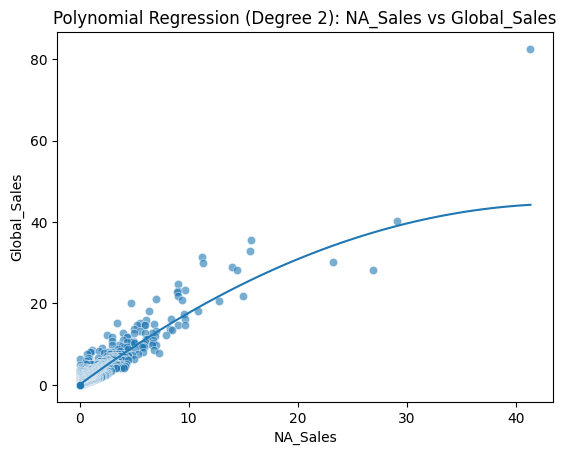

Performing polynomial regression for feature: EU_Sales
coefficients:  [ 1.22499464e+00 -1.01326531e-03]
intercept:  0.5272145664359359


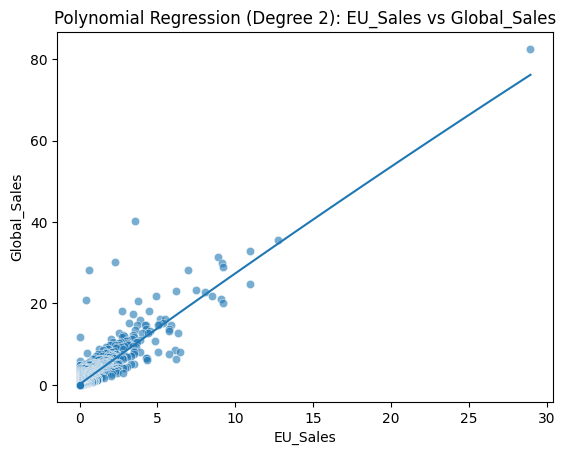

Performing polynomial regression for feature: JP_Sales
coefficients:  [0.70110935 0.01598534]
intercept:  0.5102159649553153


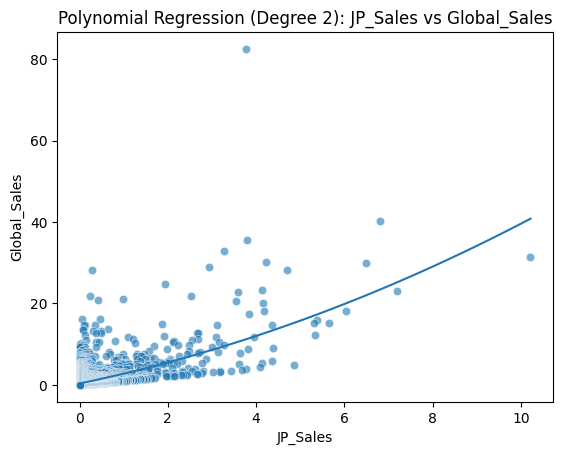

Performing polynomial regression for feature: Other_Sales
coefficients:  [ 1.48817407 -0.02165392]
intercept:  0.5478552185134559


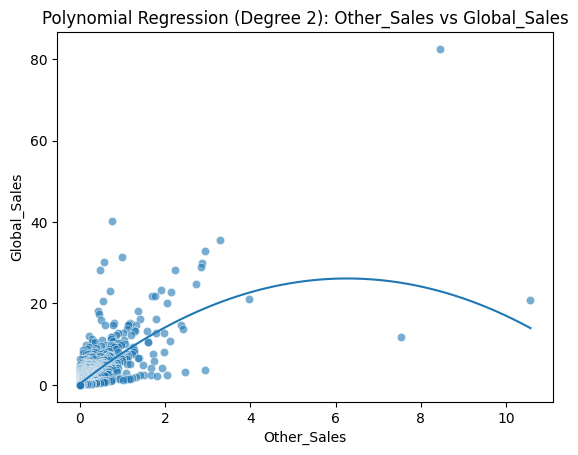

Performing polynomial regression for feature: User_Count
coefficients:  [ 0.72323172 -0.02589607]
intercept:  0.5520973750782414


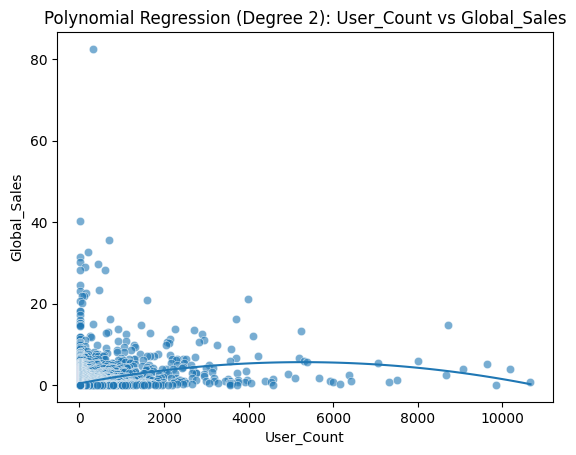

Performing polynomial regression for feature: User_Score
coefficients:  [0.1828265  0.04813429]
intercept:  0.4780670098263236


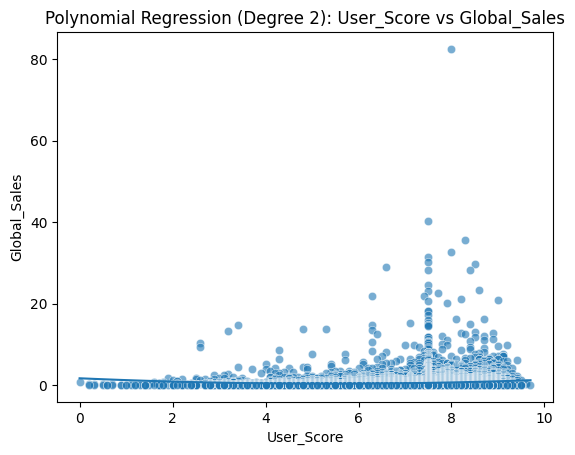

Performing polynomial regression for feature: Critic_Score
coefficients:  [0.4587274 0.1389577]
intercept:  0.38724359945280007


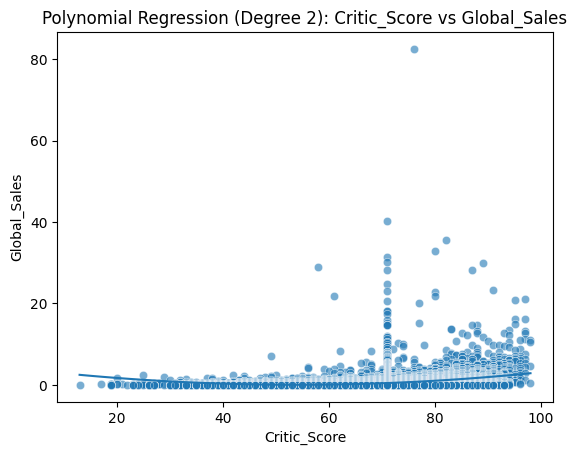

        Feature  Degree                                 Coefficients  \
0      NA_Sales       2  [1.4877762207601117, -0.012594853915302726]   
1      EU_Sales       2  [1.224994643481833, -0.0010132653067949598]   
2      JP_Sales       2    [0.701109345333947, 0.015985336173828003]   
3   Other_Sales       2   [1.4881740695496624, -0.02165391738431214]   
4    User_Count       2  [0.7232317154354507, -0.025896073949095523]   
5    User_Score       2   [0.18282649600620315, 0.04813429130281421]   
6  Critic_Score       2     [0.4587274024866066, 0.1389577016763207]   

   Intercept  Mean Absolute Error  Mean Squared Error  \
0   0.538796             0.210965            0.687693   
1   0.527215             0.239650            0.309615   
2   0.510216             0.515368            2.804124   
3   0.547855             0.284957            1.603200   
4   0.552097             0.564298            3.959374   
5   0.478067             0.607930            4.114231   
6   0.387244            

In [25]:
def polynomial_regression(df, feature_column, target_column, degree):
    # Extract the input feature
    # we need to re-shape x so that it has
    # 2 dimensions.
    x = df[feature_column].to_numpy().reshape(-1, 1)
    # Extract the output feature
    y = df[target_column]
    # Split the x and y data between the
    # training and testing datasets.
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    # Create an instance of the StandardScaler class
    scale = StandardScaler()
    # Fit the standard scaler to the input data that
    # we have in x_train.
    scale.fit(x_train)
    # Now apply the standard scaler transformation
    # to both the training and the testing sets.
    x_train_scaled = scale.transform(x_train)
    x_test_scaled = scale.transform(x_test)
    # Import the PolynomialFeatures class from the
    # sklearn library.
    from sklearn.preprocessing import PolynomialFeatures
    # Create an instance of the PolynomialFeatures class.
    # We can set the degree of the polynomial here, for
    # this exercise we are using a degree of 2. We set the
    # include_bias parameter to false, this means that we
    # don't include the constant (intercept) term with these
    # polynomial features. We will see that this gets added
    # in later instead, using the intercept.
    poly = PolynomialFeatures(degree=degree, include_bias = False)
    # Now apply this PolynomialFeatures transformation to
    # the scaled input data from the training set. The result
    # will give us a 2-dimensional array, where the first column
    # contains the terms for x and the second column contains
    # the terms for x**2.
    x_poly = poly.fit_transform(x_train_scaled)
    # Create an instance of the LinearRegression model.
    games_poly = LinearRegression()
    # Fit the model to the training data.
    games_poly.fit(x_poly, y_train)
    # Get the fit coefficients from the
    # best-fit model.
    coefficients = games_poly.coef_
    intercept = games_poly.intercept_
    # Print the coefficients
    print("coefficients: ", coefficients)
    print("intercept: ", intercept)
    #We first need to create
    # the polynomial features from the scaled
    # inputs features in the testing set, and then
    # we can use this with the final trained model
    # to get the predicted Global Sales.
    x_test_poly = poly.fit_transform(x_test_scaled)
    games_pred = games_poly.predict(x_test_poly)
    # Calculate the mean absolute error
    mean_abs = mean_absolute_error(y_test, games_pred)
    # Calculate the mean squared error
    mean_squared = mean_squared_error(y_test, games_pred)
    # Calculate the root mean squared error
    rms_error = np.sqrt(mean_squared)
    # Calculate the R2 score
    R2 = r2_score(y_test, games_pred)
    # Create an array of values covering the range
    # of Global Sales
    x_fit = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)
    # Apply the standardisation transformation using
    # the same StandardScaler that we used on the
    # training and testing data.
    x_fit_scaled = scale.transform(x_fit)
    # Create the polyomial features and apply them
    # to the trained model. This will give us the
    # y-values for the best-fit line.
    x_fit_poly = poly.fit_transform(x_fit_scaled)
    y_fit = games_poly.predict(x_fit_poly)
    # Use seaborn to create a scatter plot of numerical features
    # versus Global sales.
    sns.scatterplot(x=df[feature_column], y=df[target_column], alpha=0.6)
    # Plot the best-fit line from
    # the trained model
    plt.plot(x_fit, y_fit)
    # Label both axes
    plt.xlabel(feature_column)
    plt.ylabel(target_column)
    plt.title(f"Polynomial Regression (Degree {degree}): {feature_column} vs {target_column}")
    # Show the plot
    plt.show()
    return {
        "Feature": feature_column,
        "Degree": degree,
        "Coefficients": coefficients,
        "Intercept": intercept,
        "Mean Absolute Error": mean_abs,
        "Mean Squared Error": mean_squared,
        "Root Mean Squared Error": rms_error,
        "R2 Score": R2
    }
           
# List of numerical feature columns (excluding the target column)
numerical_features = ["NA_Sales", "EU_Sales", "JP_Sales", "Other_Sales", "User_Count", "User_Score", "Critic_Score"]

# Target column
target = "Global_Sales"

# Degree of the polynomial
degree = 2

# Perform polynomial regression for each numerical feature
poly_results = []
for feature in numerical_features:
    print(f"Performing polynomial regression for feature: {feature}")
    result = polynomial_regression(df, feature, target, degree=degree)
    poly_results.append(result)

# Display results
poly_results_df = pd.DataFrame(poly_results)
print(poly_results_df)
    

### 1b Multiple Input Features

In [26]:
def multiple_linear_regression(df, feature_columns, target_column):
    # Extract the input features. Note that we do not
    # need to re-shape x in this example, because
    # it is already a 2-dimensional array.
    x = df[feature_columns]
    # Extract the output feature
    y = df[target_column]
    # Split the x and y data between the
    # training and testing datasets.
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    # Create an instance of the StandardScaler class
    scale = StandardScaler()
    # Fit the standard scaler to the input data that
    # we have in x_train.
    scale.fit(x_train)
    # Now apply the standard scaler transformation
    # to both the training and the testing sets.
    x_train_scaled = scale.transform(x_train)
    x_test_scaled = scale.transform(x_test)
    # Create an instance of the model
    games_linear_mulitiple = LinearRegression()
    # Fit the model to the training data.
    games_linear_mulitiple.fit(x_train_scaled, y_train)
    # Get the fit coefficients from the
    # best-fit model.
    intercept = games_linear_mulitiple.intercept_
    coefficients = games_linear_mulitiple.coef_
    # Use the final, trained model to predict the
    # outputs (global sales) for countries in
    # the testing dataset.
    games_pred = games_linear_mulitiple.predict(x_test_scaled)
    # Calculate the mean absolute error
    mean_abs = mean_absolute_error(y_test, games_pred)
    # Calculate the mean squared error
    mean_squared = mean_squared_error(y_test, games_pred)
    # Calculate the root mean squared error
    rms_error = np.sqrt(mean_squared)
    # Calculate the R2 score
    R2 = r2_score(y_test, games_pred)
    # Print the results of these metrics.
    print("Coefficients:", coefficients)
    print("Intercept:", intercept)
    print("Mean Absolute Error:", mean_abs)
    print("Mean Squared Error:", mean_squared)
    print("Root Mean Squared Error:", rms_error)
    print("R2 Score:", R2)
    return {
        "Coefficients": coefficients,
        "Intercept": intercept,
        "Mean Absolute Error": mean_abs,
        "Mean Squared Error": mean_squared,
        "Root Mean Squared Error": rms_error,
        "R2 Score": R2
    }
features = ["NA_Sales", "EU_Sales", "Other_Sales"]
target = "Global_Sales"
results = multiple_linear_regression(df, features, target)

Coefficients: [0.85064879 0.52428173 0.15601223]
Intercept: 0.5262013011291409
Mean Absolute Error: 0.11253070980961638
Mean Squared Error: 0.08032859181549898
Root Mean Squared Error: 0.2834229909790294
R2 Score: 0.9805490711152584


#### 1c Random Forest Regressor

In [27]:
def random_forest_regression(df, numerical_features, categorical_features, target):    
    # Extract numerical features
    x_numerical = df[numerical_features]
    # Scale numerical features using MinMaxScaler
    scale = MinMaxScaler()
    scale.fit(x_numerical)
    x_numerical_scaled = scale.transform(x_numerical)
    # Extract the categorical columns
    x_cat = df[categorical_features]
    # Create an instance of the LabelEncoder class
    label = LabelEncoder()
    # Now apply this transformation to the data.
    x_cat_encoded = x_cat.apply(lambda col: LabelEncoder().fit_transform(col))
    
    # If needed, convert x_cat_encoded to a NumPy array
    x_cat_label = x_cat_encoded.values
    
    # Now concatenate the numerical and categorical input features into a single array
    x = np.concatenate((x_numerical_scaled, x_cat_label), axis=1)
    # Extract target variable
    y = df[target]
    # Split between training and test sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
    # Create an instance of the RandomForestRegressor model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
    
    # Fit the model to the training data
    rf_model.fit(x_train, y_train)
    
    # Make predictions on the test data
    games_pred = rf_model.predict(x_test)
    
    # Calculate the performance metrics
    mean_abs = mean_absolute_error(y_test, games_pred)
    mean_squared = mean_squared_error(y_test, games_pred)
    rms_error = mean_squared ** 0.5
    #rms_error = mean_squared_error(y_test, games_pred, squared=False)
    R2 = r2_score(y_test, games_pred)
    
    # Print the evaluation results
    print("Mean absolute error: ", mean_abs)
    print("Mean squared error: ", mean_squared)
    print("Root mean squared error: ", rms_error)
    print("R2: ", R2)
    return {
        "Model": rf_model,
        "Mean Absolute Error": mean_abs,
        "Mean Squared Error": mean_squared,
        "Root Mean Squared Error": rms_error,
        "R2 Score": R2
    }
numerical_features = ["NA_Sales", "EU_Sales", "Other_Sales"]
categorical_features = ["Platform", "Publisher", "Rating"]
target = "Global_Sales"

results = random_forest_regression(df, numerical_features, categorical_features, target)

Mean absolute error:  0.09700743191817016
Mean squared error:  0.6970436501942979
Root mean squared error:  0.8348914002397545
R2:  0.8312164303759887


#### 1d Artificial Neural Network (ANN)

In [28]:
# Extract the input features, which we will call x.
feature_names = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
x = df[feature_names]
# Extract the output features, which we will call y.
y = df["Global_Sales"]
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
# Create an instance of the MinMaxScaler class
scale = MinMaxScaler()
# Fit the min-max scaler to the input data in x_train.
# This will find the minimum and maximum value
# of each column in x_train. Note that we are
# using the training dataset here.
scale.fit(x_train)
# Now we need to apply this min-max scaler
# transformation. Note that we apply it to 
# both the training and the testing datasets,
# but it is the same transformation that we
# apply to both. This is important, because
# we need to re-scale both the training and
# the testing set in the same way.
x_train_scaled = scale.transform(x_train)
x_test_scaled = scale.transform(x_test)
x_train_scaled

array([[0.00412655, 0.        , 0.        , 0.00094607],
       [0.00068776, 0.0015674 , 0.01076321, 0.00094607],
       [0.01341128, 0.01802508, 0.        , 0.00567644],
       ...,
       [0.00997249, 0.0015674 , 0.        , 0.00283822],
       [0.03198074, 0.02115987, 0.07338552, 0.0037843 ],
       [0.        , 0.        , 0.00195695, 0.        ]])

In [29]:
# Import the necessary libraries to build a neural network.
# We will build our model using the sequential model class.
from keras.models import Sequential
# We also need to import the Keras layers Dense (which will
# allow us to define fully-connected layers in the network)
# Dense indicates fully-connected networks
# and Dropout (which will allow us to set a drop out rate
# on layers in the network).
from keras.layers import Dense, Dropout, Input

In [30]:
# Start by creating an instance of the Sequential class.
# This will be our model.
model = Sequential()
# We will use the model's add() function to add
# each layer of the network in turn.
# The inputs to the model have 4 units or shapes
# (i.e. input_dim = 4), corresponding to
# the 4 features (or variables) that we
# are using as inputs to the model.
# these four input features are 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales'
model.add(Input(shape=(4,)))
# this will be followed by the first hidden layer of
# the network, which will be a Dense (i.e.
# fully connected) layer with 64 neurons (i.e. units)
# We also need to specify the activation
# function. We will use the ReLU function
# for this. 
model.add(Dense(units = 64, activation = "relu"))
# model.add(Dense(units = 64, input_dim = (4), activation = "relu"))
# Next, we want to apply a 20% dropout rate to
# this hidden layer, to help prevent overfitting
# We can do this by
# adding a Dropout layer here.
model.add(Dropout(0.2))
# Now add a second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# Finally, we need to create the output layer.
# This will have 1 unit because we are predicting
# one value (the global sales) as the output.
# Also, we will use the linear activation function,
# because this is a regression problem, predicting a
# continuous output variable.
model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,545 (17.75 KB)

 Trainable params: 4,545 (17.75 KB)

 Non-trainable params: 0 (0.00 B)

In [31]:
# The following command will compile the model,
# using the Adam optimizer with its default parameter
# choices. We also specify the loss function and
# the metrics.
# It is used as a loss function during model training
from keras.losses import mean_squared_error
# It is used to evaluate the model's performance during training and/or validation
from keras.metrics import mean_squared_error
# adopting stochastic gradient descent, Adam to optimise weights
# from tensorflow.keras.optimizers import SGD
# importing the adam from the tensorflow
# from tensorflow.keras.optimizers import Adam
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mean_squared_error'])
print(model)
print(x_train_scaled)
print(y_train)



<Sequential name=sequential, built=True>
[[0.00412655 0.         0.         0.00094607]
 [0.00068776 0.0015674  0.01076321 0.00094607]
 [0.01341128 0.01802508 0.         0.00567644]
 ...
 [0.00997249 0.0015674  0.         0.00283822]
 [0.03198074 0.02115987 0.07338552 0.0037843 ]
 [0.         0.         0.00195695 0.        ]]
9691     0.12
8920     0.15
2955     0.69
9786     0.12
7821     0.19
         ... 
11285    0.08
11965    0.07
5391     0.34
861      1.98
15797    0.02
Name: Global_Sales, Length: 13373, dtype: float64


In [32]:
# Import the EarlyStopping class from Keras
from keras.callbacks import EarlyStopping
# Define the early stopping criterion. We will
# monitor the Validation Loss, and we will use
# a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
# Train the model. Note that we record the return value
# from the fit() command in the variable called history.
# this will allow us to plot how the losses varied with
# epoch while the model was being trained.
# Fit the model with early stopping
history = model.fit(x=x_train_scaled, y=y_train,batch_size=None, epochs=200, verbose="auto", validation_split=0.1, callbacks = [early_stopping])

Epoch 1/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - loss: 1.4907 - mean_squared_error: 1.4907 - val_loss: 0.2301 - val_mean_squared_error: 0.2301
Epoch 2/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0900 - mean_squared_error: 0.0900 - val_loss: 0.0939 - val_mean_squared_error: 0.0939
Epoch 3/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0246 - mean_squared_error: 0.0246 - val_loss: 0.0492 - val_mean_squared_error: 0.0492
Epoch 4/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0224 - mean_squared_error: 0.0224 - val_loss: 0.0338 - val_mean_squared_error: 0.0338
Epoch 5/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0232 - mean_squared_error: 0.0232 - val_loss: 0.0130 - val_mean_squared_error: 0.0130
Epoch 6/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0185 - mean_squared_error: 0.0185 - val_loss: 0.0093 - val_mean_squared_error: 0.0093
Epoch 7/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0160 - mean_squared_error: 0.0160 - val_los

In [33]:
print(df["Global_Sales"].min(),df["Global_Sales"].max())


0.01 82.53


105/105 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


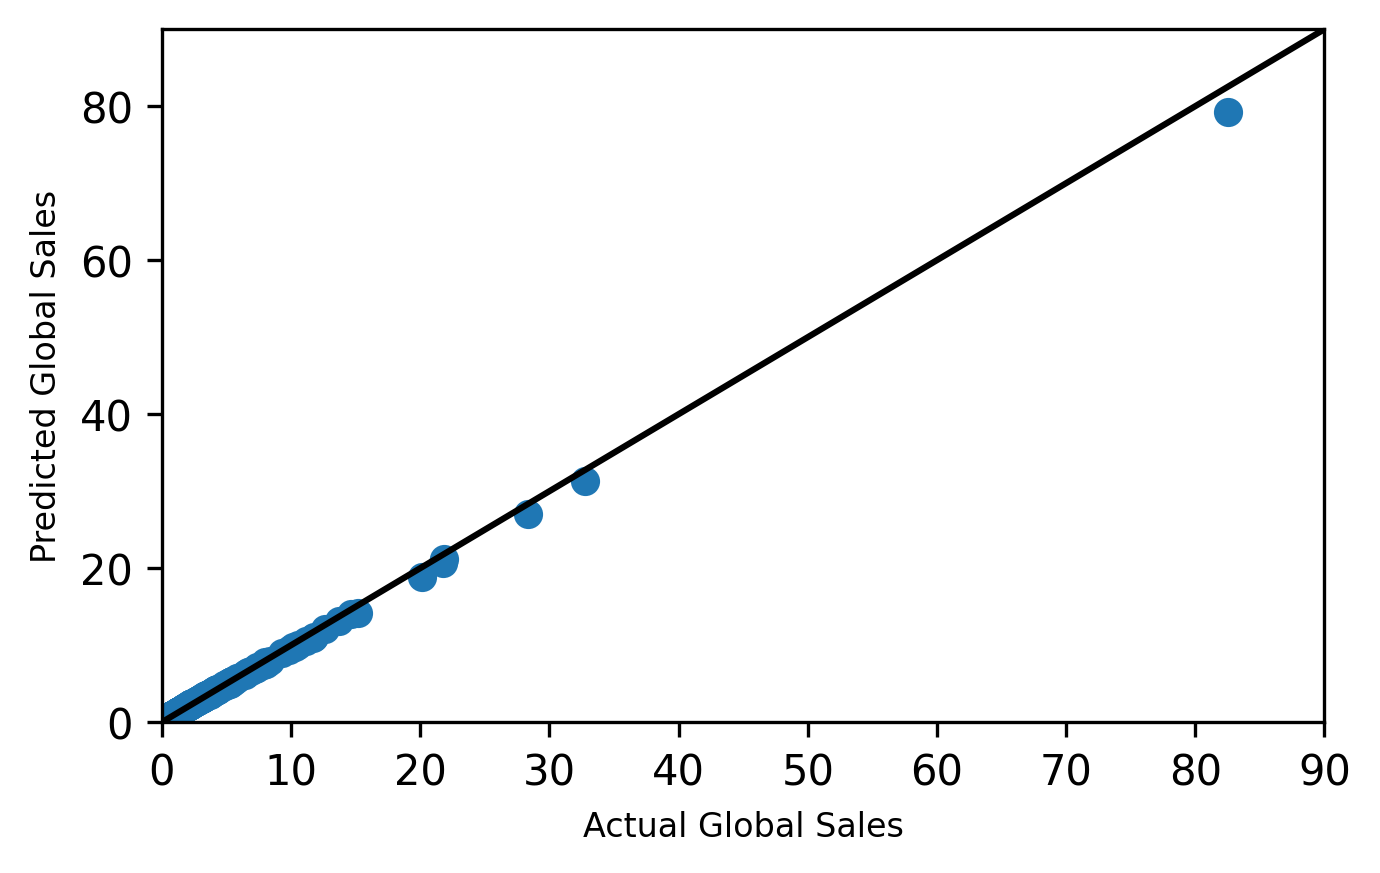

In [34]:
# Predict the model outputs for the
# testing set.
y_pred = model.predict(x_test_scaled)
# Now use matplotlib to plot the predicted vs actual
# global sales.
# Start by creating a figure
plt.figure(figsize = (5, 3), dpi = 300)
# Create a scatterplot comparing the predicted
# and actual values of the output variable.
plt.scatter(y_test, y_pred)
# Add a straight diagonal line to the plot.
# If the model is performing well, the data
# points should lie along this line, meaning
# that the predicted values are equal to the
# actual values.
plt.plot([0, 90], [0, 90], 'k-')
# Label both axes.
plt.xlabel("Actual Global Sales", fontsize=8)
plt.ylabel("Predicted Global Sales", fontsize=8)
# Limit the range of values on both axes
plt.xlim(0, 90)
plt.ylim(0, 90)
# Show the plot.
plt.show()


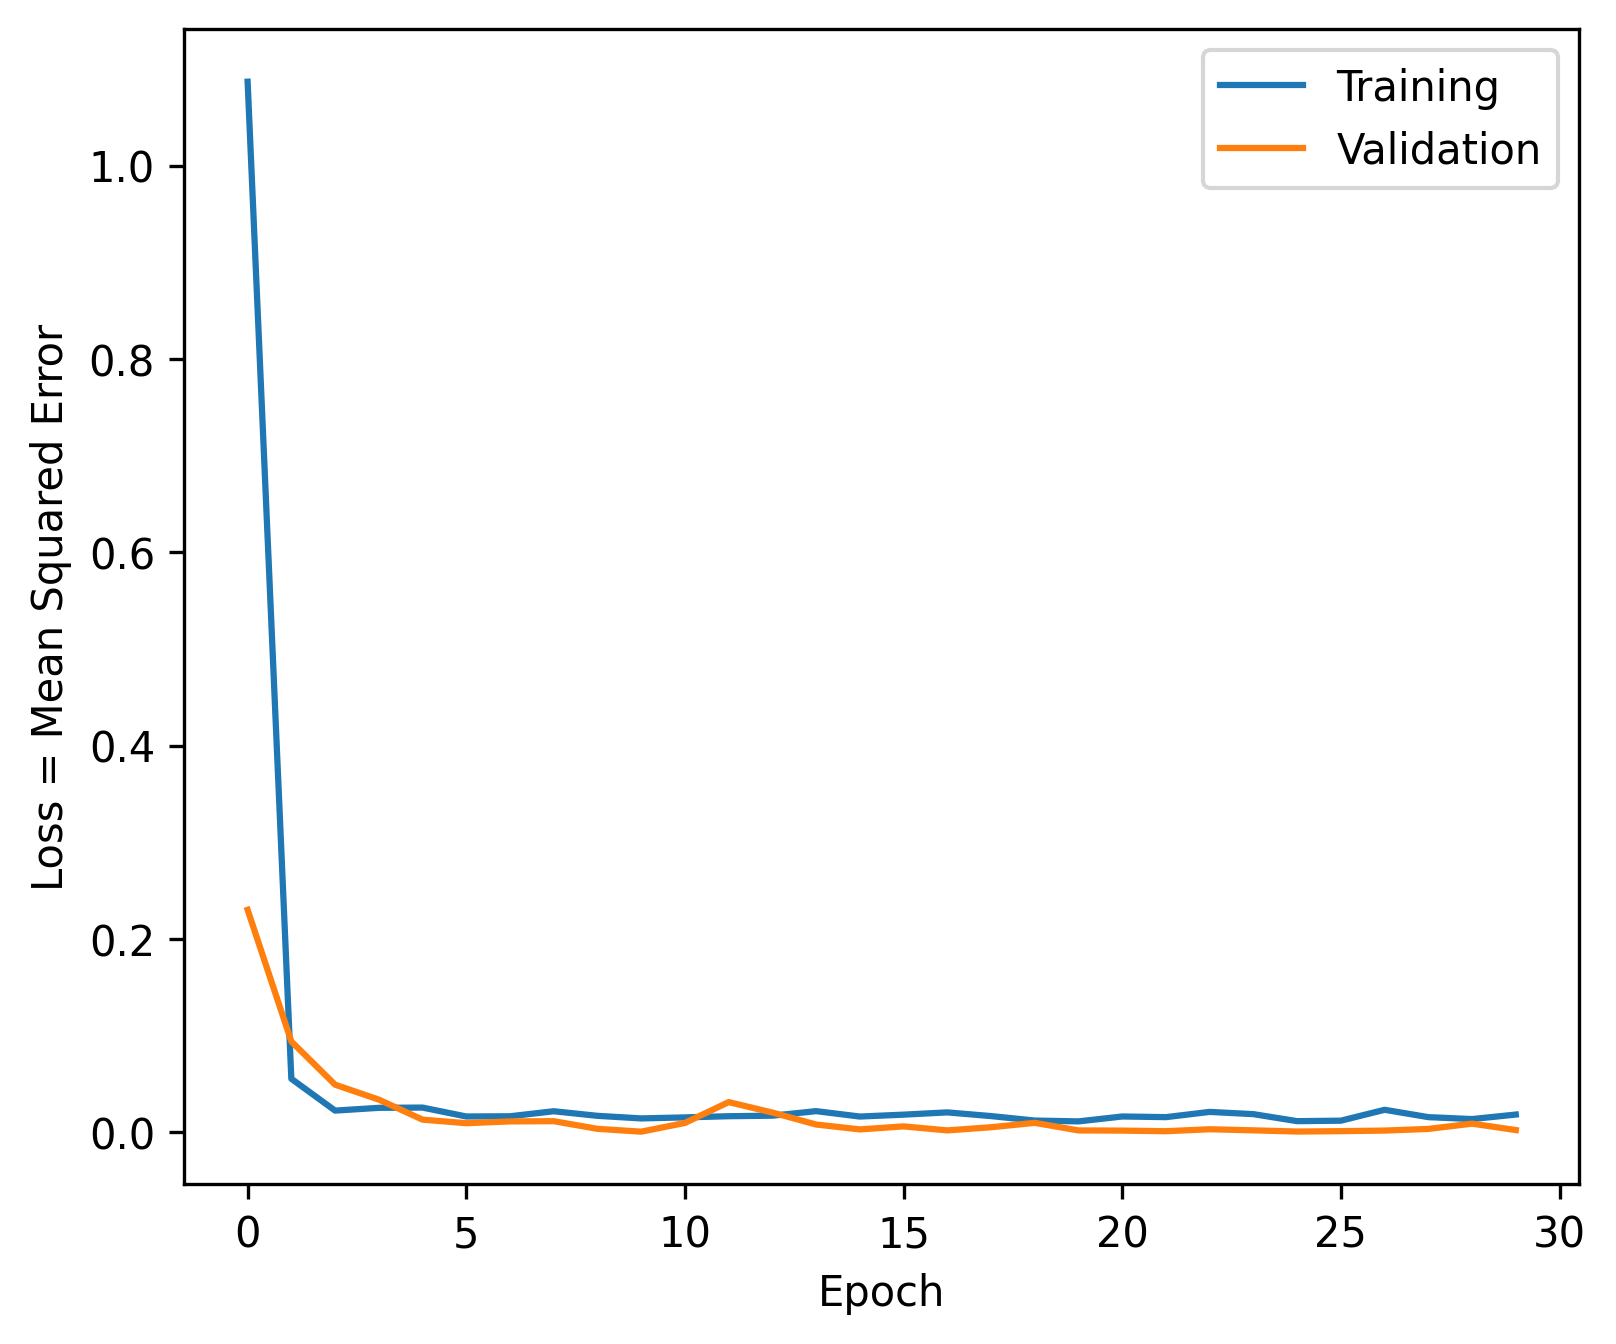

In [35]:
# We start by creating a pandas dataframe containing
# the history of the fitting.
history_df = pd.DataFrame(history.history)
# Next, use matplotlib to create a figure.
plt.figure(figsize = (6, 5), dpi = 300)
# Plot the history of the training and
# validation losses.
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
# Show the plot.
plt.show()


#### 1d  Hyperparameter tuning

##### Tuning the number of network layers(3 hidden layers)

In [36]:
# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Construct a new model
# This defines the input shape for the model.
model.add(Input(shape=(4,)))
model.add(Dense(units=64, activation="relu"))
#model.add(Dense(units=64, input_dim=(4), activation="relu"))
# Add a dropout layer with a 20% dropout rate.
model.add(Dropout(0.2))
# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# The output layer, this will have 1 unit
# because we are predicting one value
# (the global sales). Also, we will use the linear
# activation function, because this is a
# regression problem, predicting a
# continuous output variable.
model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

In [37]:
# Compile the model using the Adam optimizer.
model.compile(optimizer="adam", loss='mean_squared_error', metrics=['mean_squared_error'])
# Define the early stopping criterion, with a
# patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
#Train the model
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs = 200,
verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])

Epoch 1/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 1.3273 - mean_squared_error: 1.3273 - val_loss: 0.0398 - val_mean_squared_error: 0.0398
Epoch 2/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0335 - mean_squared_error: 0.0335 - val_loss: 0.0132 - val_mean_squared_error: 0.0132
Epoch 3/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0382 - mean_squared_error: 0.0382 - val_loss: 0.0187 - val_mean_squared_error: 0.0187
Epoch 4/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0231 - mean_squared_error: 0.0231 - val_loss: 0.0156 - val_mean_squared_error: 0.0156
Epoch 5/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0340 - mean_squared_error: 0.0340 - val_loss: 0.0036 - val_mean_squared_error: 0.0036
Epoch 6/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0209 - mean_squared_error: 0.0209 - val_loss: 0.0142 - val_mean_squared_error: 0.0142
Epoch 7/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 0.0347 - mean_squared_error: 0.0347 - val_los

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


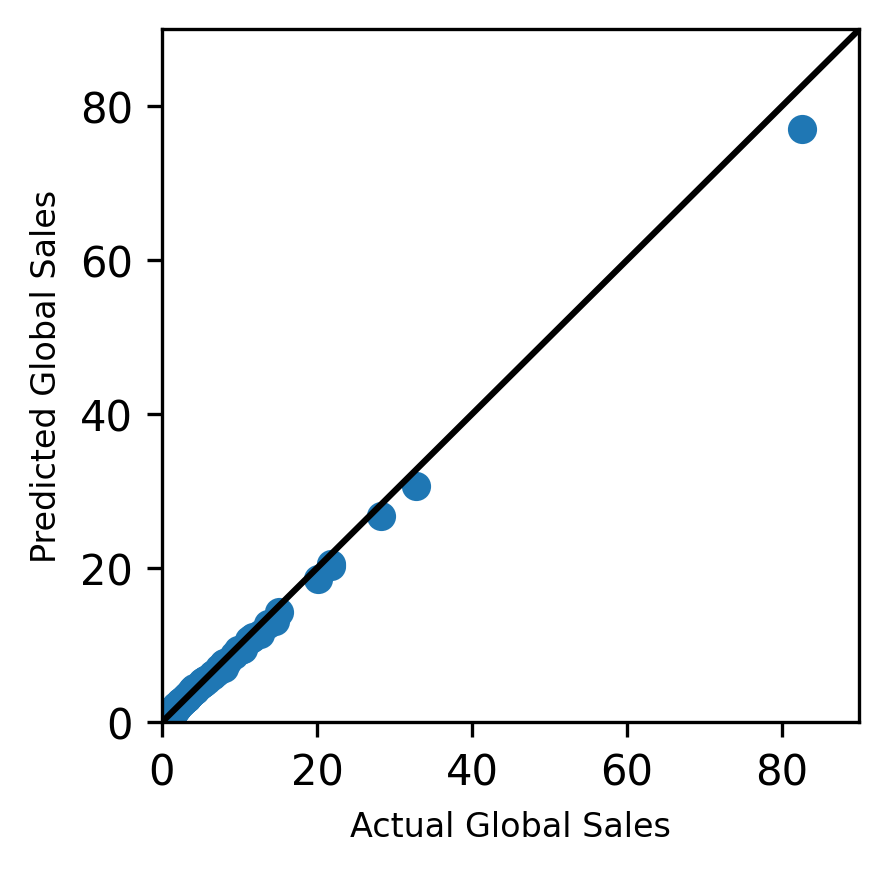

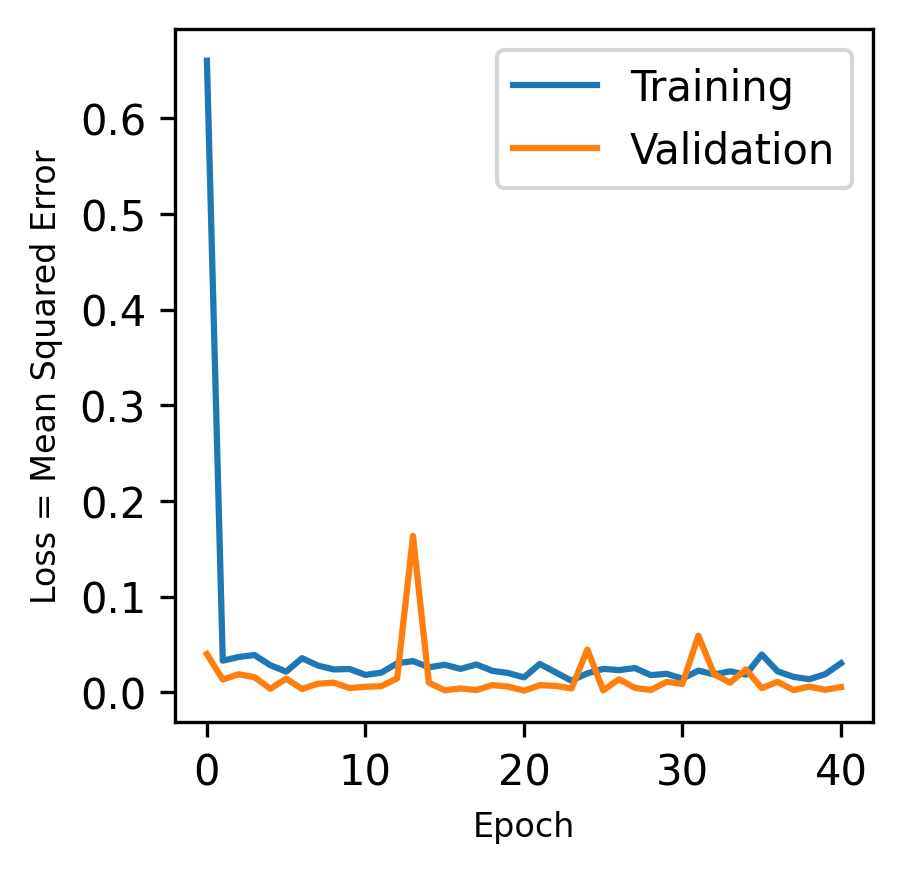

In [38]:
# Predict the model outputs for the testing set
y_pred = model.predict(x_test_scaled)
# Plot the predicted vs actual values
plt.figure(figsize = (3, 3), dpi = 300)
plt.scatter(y_test, y_pred)
# Add a diagonal line showing the
# one-to-one relation.
plt.plot([0, 90], [0, 90], 'k-')
# Label both axes.
plt.xlabel("Actual Global Sales",fontsize=8)
plt.ylabel("Predicted Global Sales",fontsize=8)
# Limit the range of values on both axes.
plt.xlim(0, 90)
plt.ylim(0, 90)
# Show the plot
plt.show()
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
plt.figure(figsize = (3, 3), dpi = 300)
# Plot the training and validation loss
# versus epoch. 
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch", fontsize=8)
plt.ylabel("Loss = Mean Squared Error", fontsize=8)
# Show the plot.
plt.show()


#### Adjusting the learning rate of optimizer

In [39]:
# If we want to change the value of the learning
# rate, we will need to use the Adam class
# from Keras.
from keras.optimizers import Adam
# Create an instance of the Adam class. We
# will set the learning_rate to 0.01 here.
adam_optimizer = Adam(learning_rate = 0.001)
# Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first hidden layer, with
# input_dim = 4, 64 units, and the
# ReLU activation function.
model.add(Input(shape=(4,)))
model.add(Dense(units=64, activation="relu"))
# Add a dropout layer with a 20% dropout rate.
model.add(Dropout(0.2))
# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# The output layer, this will have 1 unit
# because we are predicting one value
# (the global sales). Also, we will use the linear
# activation function, because this is a
# regression problem, predicting a
# continuous output variable.
model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model.summary()
# Compile the model, but we now use
# the adam_optimizer that we created
# above.
model.compile(optimizer = adam_optimizer, loss = 'mean_squared_error', metrics = ['mean_squared_error'])
# Define the early stopping criterion, with
# a patience of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
# Train the model
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs = 200,
verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])



Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_7 (Dense)                      │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.3773 - mean_squared_error: 1.3773 - val_loss: 0.0230 - val_mean_squared_error: 0.0230
Epoch 2/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0322 - mean_squared_error: 0.0322 - val_loss: 0.0070 - val_mean_squared_error: 0.0070
Epoch 3/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0259 - mean_squared_error: 0.0259 - val_loss: 0.0123 - val_mean_squared_error: 0.0123
Epoch 4/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0222 - mean_squared_error: 0.0222 - val_loss: 0.0071 - val_mean_squared_error: 0.0071
Epoch 5/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.0175 - mean_squared_error: 0.0175 - val_loss: 0.0486 - val_mean_squared_error: 0.0486
Epoch 6/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0194 - mean_squared_error: 0.0194 - val_loss: 0.0062 - val_mean_squared_error: 0.0062
Epoch 7/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0267 - mean_squared_error: 0.0267 - val_los

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


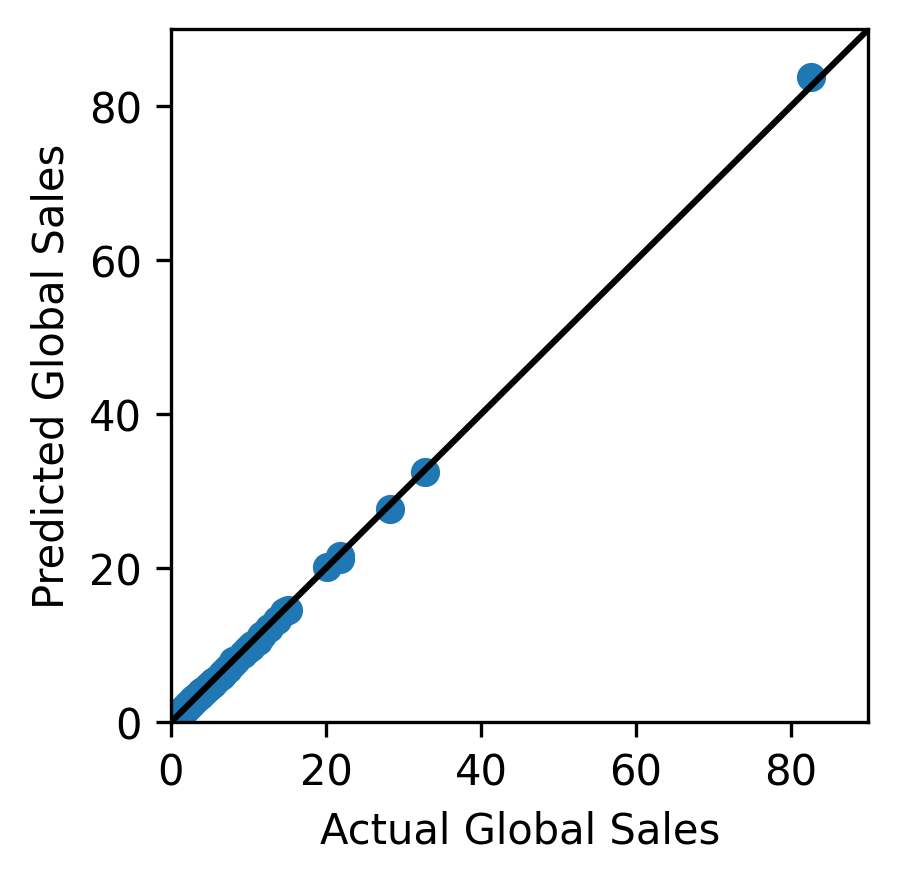

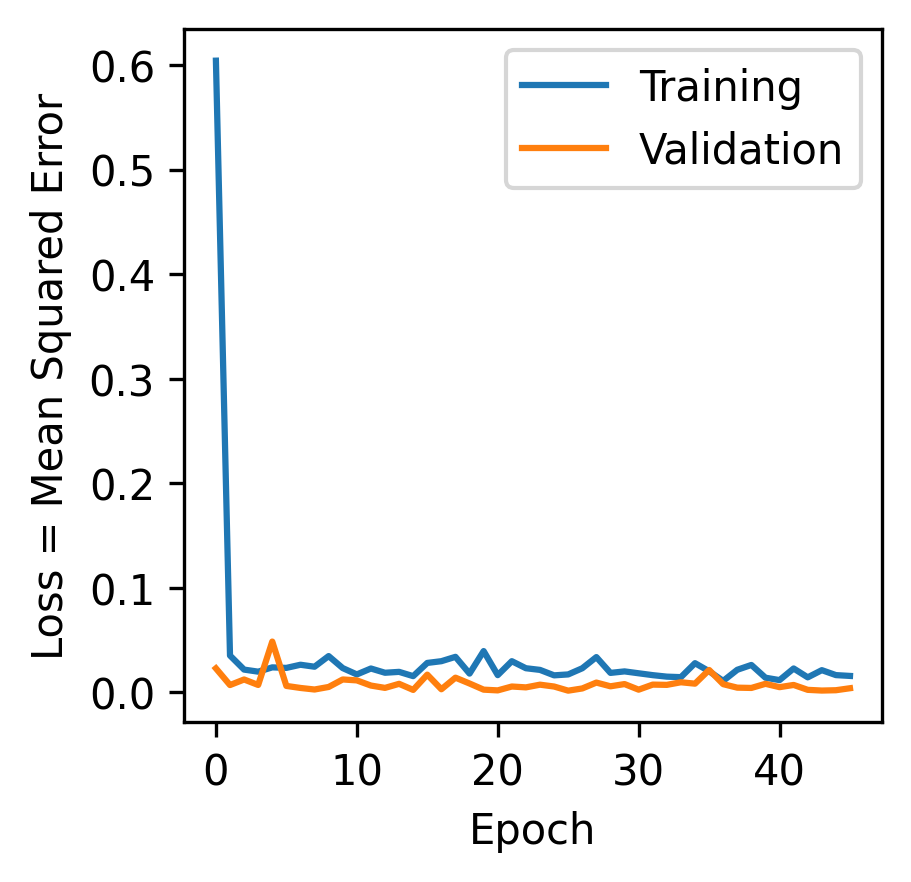

In [40]:
# Predict the model outputs for the training set.
y_pred = model.predict(x_test_scaled)
# Plot predicted vs actual values
plt.figure(figsize = (3, 3), dpi = 300)
plt.scatter(y_test, y_pred)
# Plot a diagonal line showing the
# one-to-one relation.
plt.plot([0, 90], [0, 90], 'k-')
# Label both axes.
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
# Limit the range of values on
# each axis.
plt.xlim(0, 90)
plt.ylim(0, 90)
# Show the plot.
plt.show()
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation
# losses versus epoch.
plt.figure(figsize = (3, 3), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
# Show the plot.
plt.show()


##### Changing the dropout rate

In [41]:
#Create an instance of the Sequential class.
# This will be our model.
model = Sequential()
# Add the first hidden layer, with
# input_dim = 3, 64 units, and the
# ReLU activation function.
model.add(Input(shape=(4,)))
model.add(Dense(units=64, activation="relu"))
#model.add(Dense(units = 64, input_dim = (3), activation = "relu"))
# Add a dropout layer with a 10% dropout rate.
model.add(Dropout(0.1))
# Second hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# Third hidden layer with 64 units and
# the ReLU activation function.
model.add(Dense(units = 64, activation = "relu"))
# The output layer, this will have 1 unit
# because we are predicting one value
# (the global sales). Also, we will use the linear
# activation function, because this is a
# regression problem, predicting a
# continuous output variable.
model.add(Dense(units = 1, activation = "linear"))
# Print a summary of the model
model.summary()
# Compile the model with the default Adam optimizer
model.compile(optimizer="adam", loss='mean_squared_error', metrics= ['mean_squared_error'])
# Define an early stopping criterion with a patience
# of 20.
early_stopping = EarlyStopping(monitor='val_loss', patience = 20)
# Train the model
history = model.fit(x = x_train_scaled, y = y_train, batch_size = None, epochs = 200,verbose = "auto", validation_split = 0.1, callbacks = [early_stopping])


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_11 (Dense)                     │ (None, 64)                  │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - loss: 1.4609 - mean_squared_error: 1.4609 - val_loss: 0.1370 - val_mean_squared_error: 0.1370
Epoch 2/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - loss: 0.0353 - mean_squared_error: 0.0353 - val_loss: 0.0356 - val_mean_squared_error: 0.0356
Epoch 3/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.0167 - mean_squared_error: 0.0167 - val_loss: 0.0143 - val_mean_squared_error: 0.0143
Epoch 4/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - loss: 0.0136 - mean_squared_error: 0.0136 - val_loss: 0.0082 - val_mean_squared_error: 0.0082
Epoch 5/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.0107 - mean_squared_error: 0.0107 - val_loss: 0.0042 - val_mean_squared_error: 0.0042
Epoch 6/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - loss: 0.0137 - mean_squared_error: 0.0137 - val_loss: 0.0027 - val_mean_squared_error: 0.0027
Epoch 7/200
377/377 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0164 - mean_squared_error: 0.0164 - val_los

105/105 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


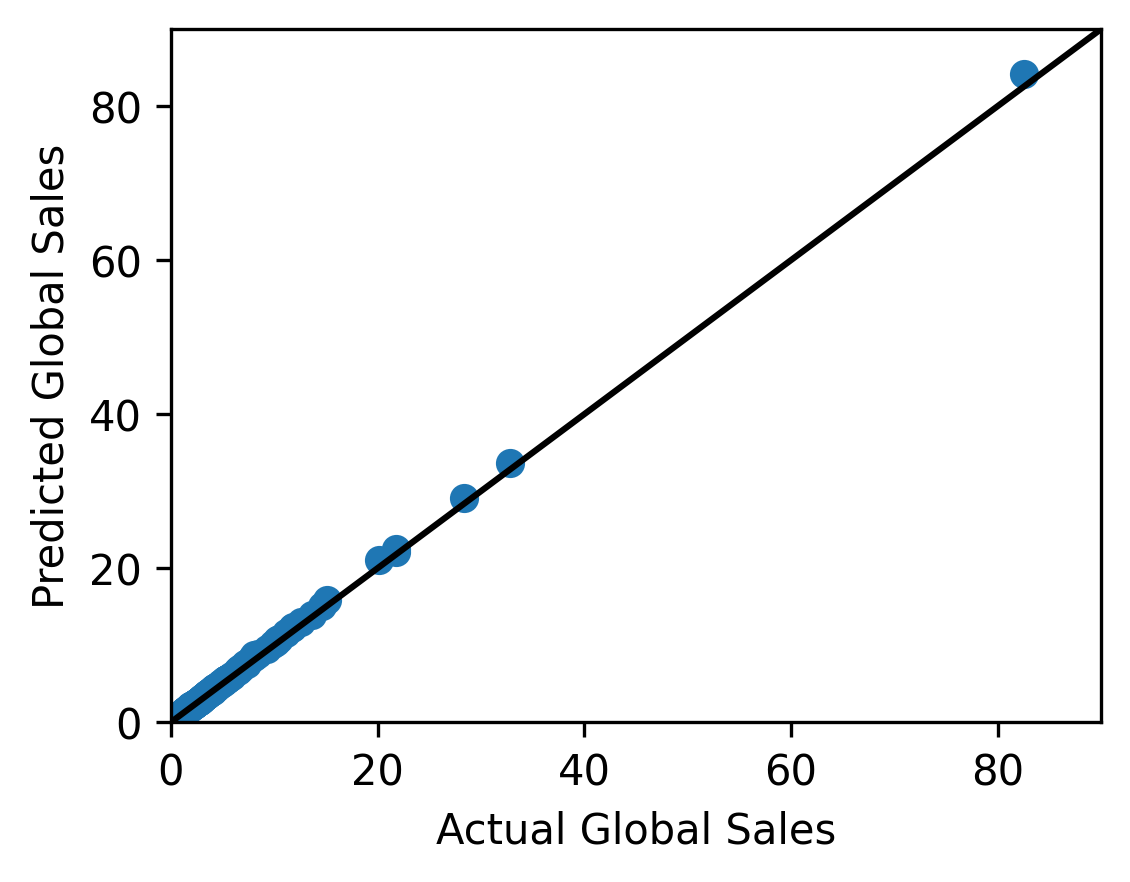

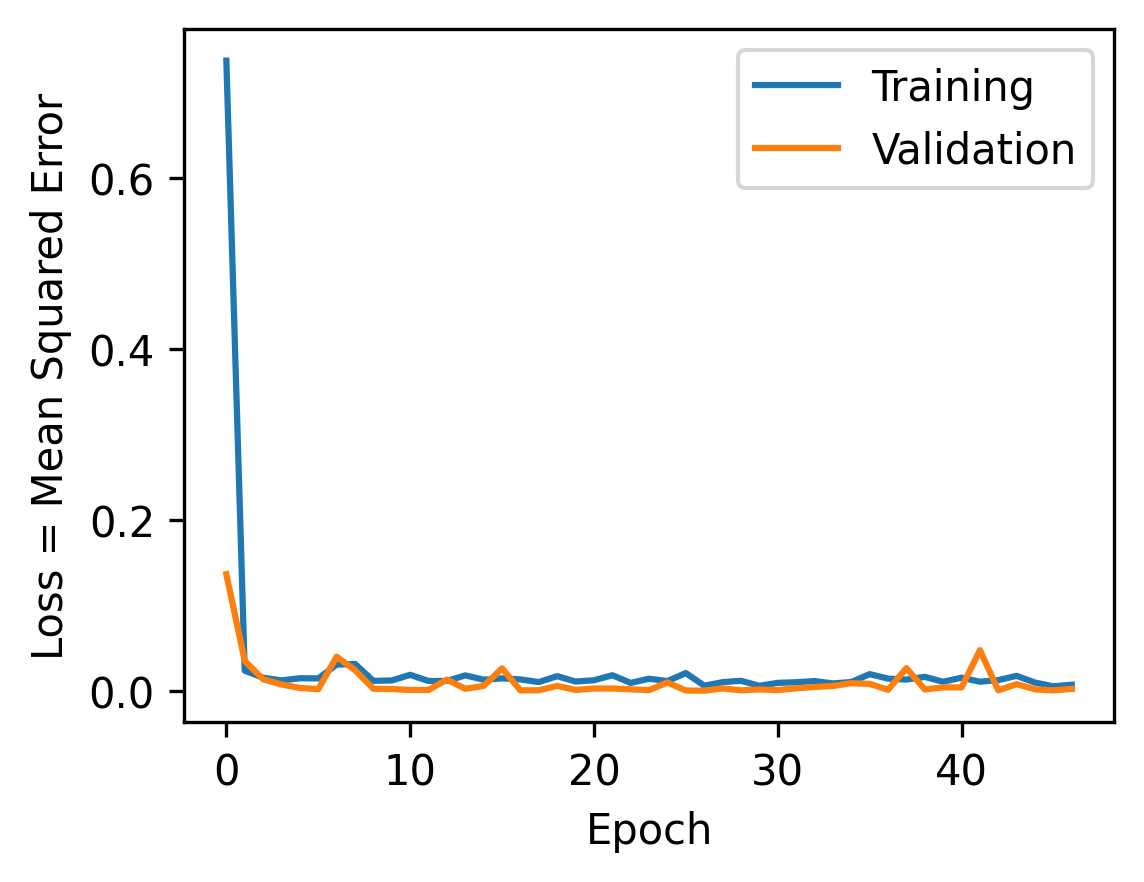

Mean Absolute Error (MAE): 0.029584729966070304
Mean Squared Error (MSE): [2.5263140e-03 3.8141123e-04 1.3747643e-07 ... 2.0391238e-03 7.9245394e-04
 1.2773061e-04]
Root Mean Squared Error (RMSE): [0.05026245 0.01952975 0.00037078 ... 0.04515666 0.02815056 0.0113018 ]
R-squared (R²): 0.999034738202244


In [42]:
# Predict the model outputs
y_pred = model.predict(x_test_scaled)
# Plot predicted vs actual values
plt.figure(figsize = (4, 3), dpi = 300)
plt.scatter(y_test, y_pred)
# Plot a diagonal line to show the
# one-to-one relation
plt.plot([0, 90], [0, 90], 'k-')
# Label both axes.
plt.xlabel("Actual Global Sales")
plt.ylabel("Predicted Global Sales")
# Restrict the range of values on each axis.
plt.xlim(0, 90)
plt.ylim(0, 90)
# Show the plot.
plt.show() 
# Create a pandas dataframe containing
# the history of the fitting
history_df = pd.DataFrame(history.history)
# Plot the training and validation losses
# versus epoch.
plt.figure(figsize = (4, 3), dpi = 300)
plt.plot(history_df["loss"], label = "Training")
plt.plot(history_df["val_loss"], label = "Validation")
# Add a legend to the plot.
plt.legend()
# Label both axes.
plt.xlabel("Epoch")
plt.ylabel("Loss = Mean Squared Error")
# Show the plot.
plt.show()
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")


#### 1f Kmeans Clustering

Analyzing feature combination: ['NA_Sales', 'EU_Sales']


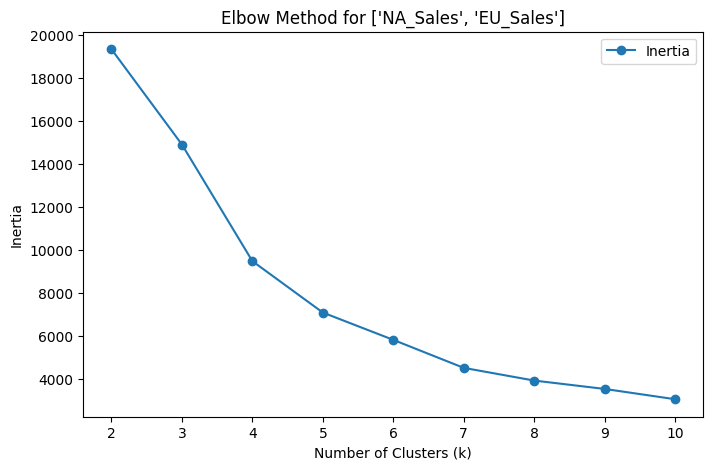

Analyzing feature combination: ['NA_Sales', 'JP_Sales']


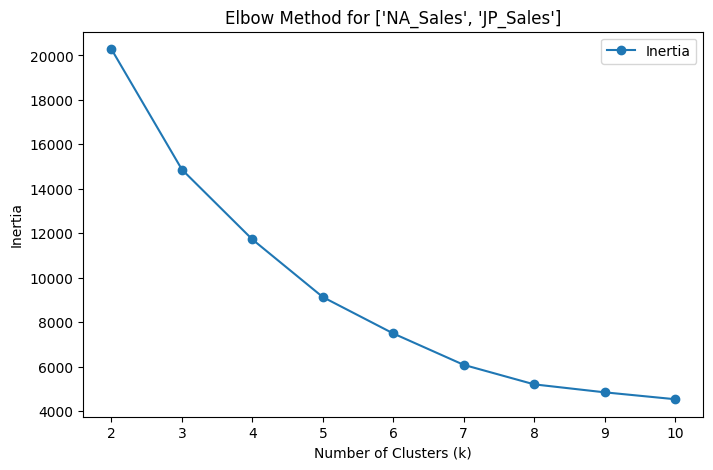

Analyzing feature combination: ['NA_Sales', 'Other_Sales']


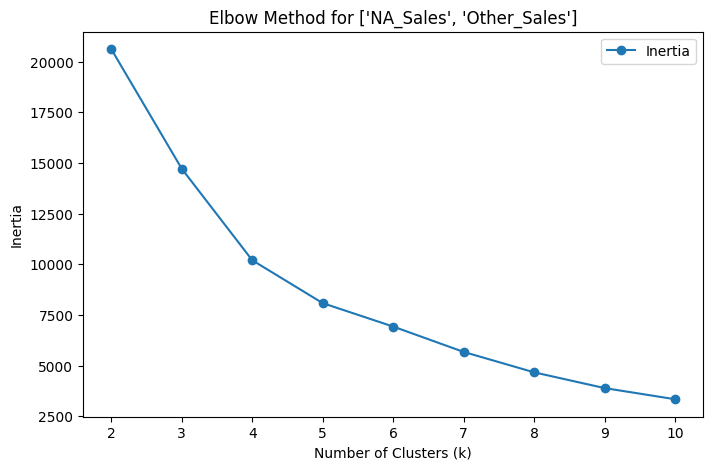

Analyzing feature combination: ['EU_Sales', 'JP_Sales']


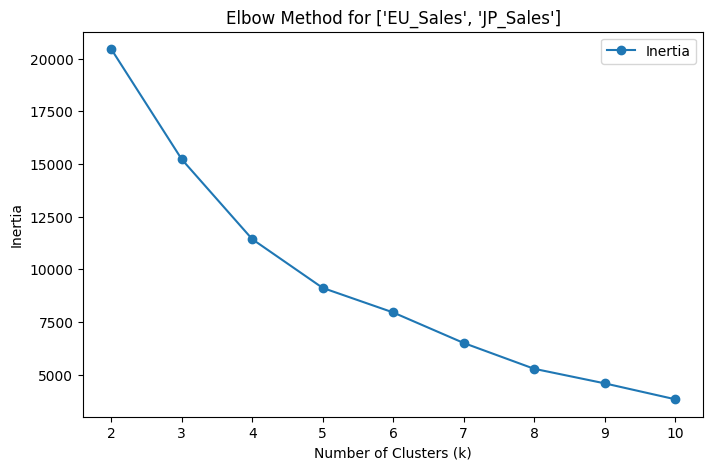

Analyzing feature combination: ['EU_Sales', 'Other_Sales']


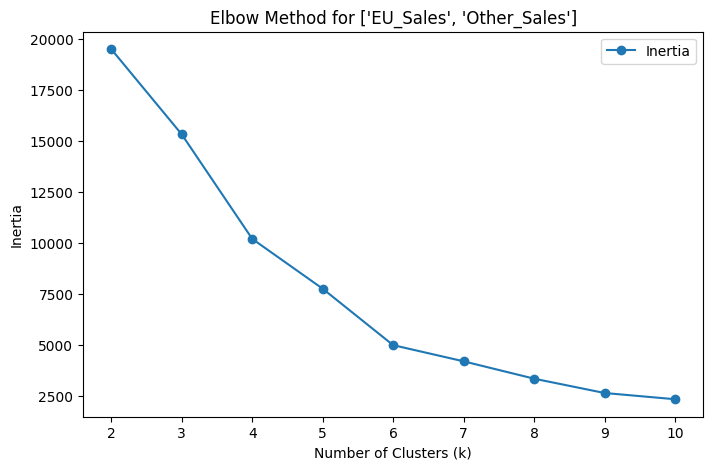

Analyzing feature combination: ['JP_Sales', 'Other_Sales']


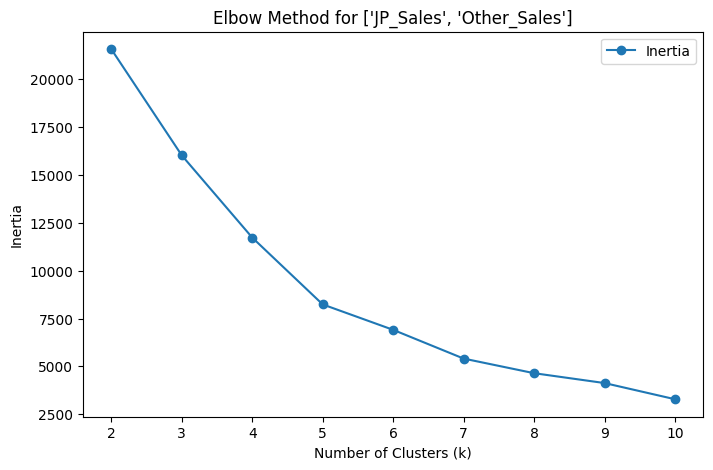

Analyzing feature combination: ['NA_Sales', 'EU_Sales', 'JP_Sales']


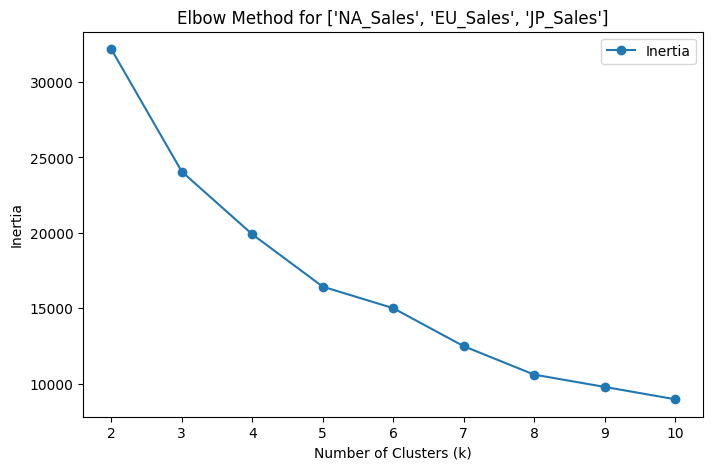

Analyzing feature combination: ['NA_Sales', 'EU_Sales', 'Other_Sales']


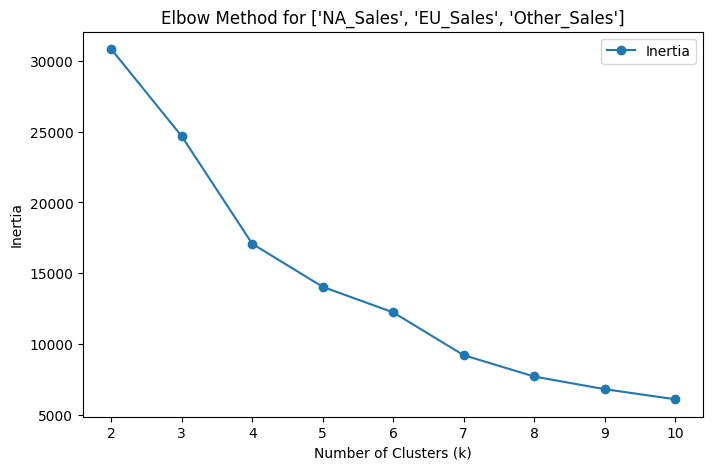

Analyzing feature combination: ['NA_Sales', 'JP_Sales', 'Other_Sales']


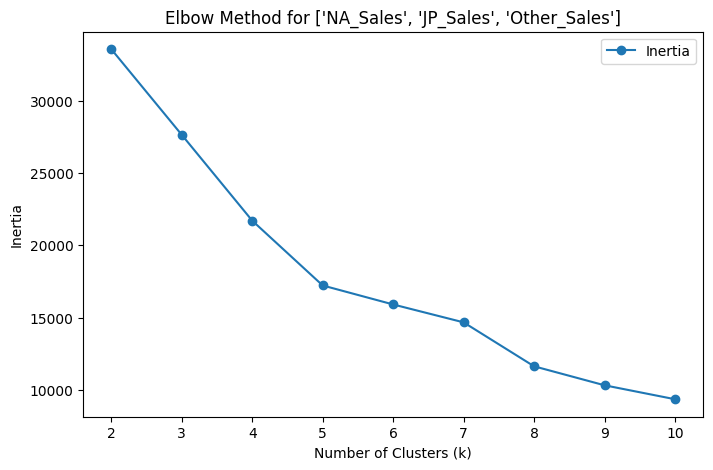

Analyzing feature combination: ['EU_Sales', 'JP_Sales', 'Other_Sales']


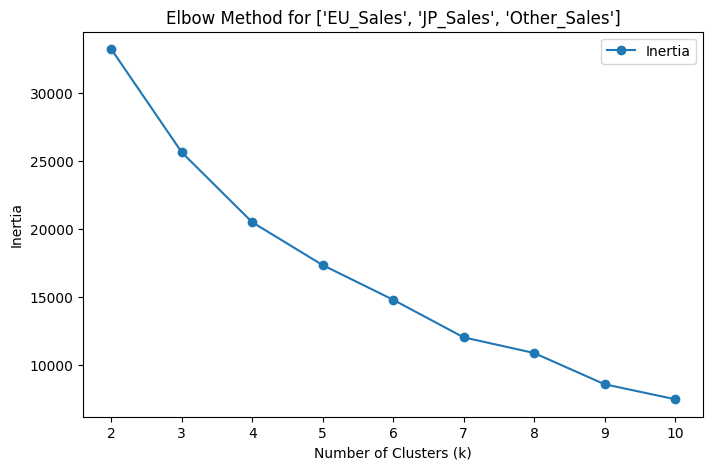

Analyzing feature combination: ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']


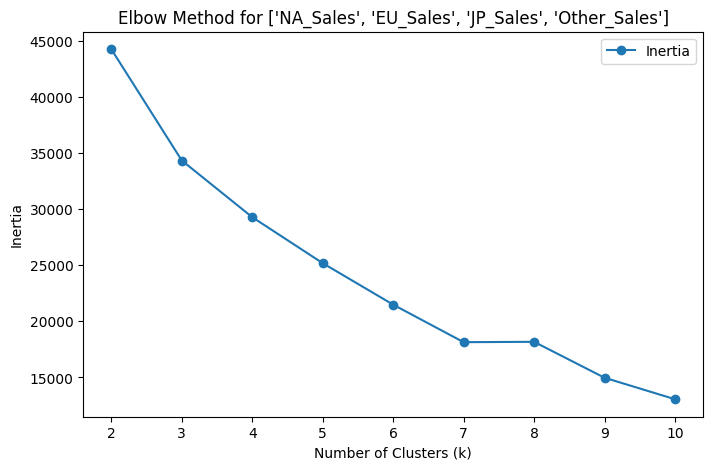


Best Feature Combination Based on Davies-Bouldin and Silhouette Scores:
Feature Combination: ['NA_Sales', 'EU_Sales']
Optimal k: None
Davies-Bouldin Score: 0.6117506766404435
Silhouette Score: 0.9392166691358879


In [43]:
def kmeans_elbow_point(df, numerical_features, k_range):
    
    results = {}
    best_combination = None
    # Initialize Davies-Bouldin Score with a large value
    best_db_score = float('inf')  
    # Initialize Silhouette Score with the worst possible score (Silhouette score ranges from -1 to 1)
    best_sil_score = -1  
    scaler = StandardScaler()
    
    # Generate all possible combinations of numerical features (at least 2 features in each combination)
    for r in range(2, len(numerical_features) + 1):
        for feature_comb in combinations(numerical_features, r):
            # Convert tuple to list
            feature_comb = list(feature_comb)  
            print(f"Analyzing feature combination: {feature_comb}")
            
            # Scale the features
            x = df[feature_comb]
            x_scaled = scaler.fit_transform(x)
            
            inertia_list = []
            db_scores = []
            s_scores = []
            optimal_k = None
            
            # Perform k-means clustering for different values of k
            for k in range(k_range[0], k_range[1]):
                kmeans = KMeans(n_clusters=k, random_state=42)
                kmeans.fit(x_scaled)
                cluster_labels = kmeans.predict(x_scaled)
                
                # Record the inertia (sum of squared distances to the closest cluster center)
                inertia_list.append(kmeans.inertia_)
                
                # Calculate evaluation metrics
                db_score = davies_bouldin_score(x_scaled, cluster_labels)
                s_score = silhouette_score(x_scaled, cluster_labels)
                
                db_scores.append(db_score)
                s_scores.append(s_score)

                # Check if this combination is better than previous ones
                if db_score < best_db_score and s_score > best_sil_score:
                    best_db_score = db_score
                    best_sil_score = s_score
                    best_combination = feature_comb
                    optimal_k = k
            # Plot the elbow method for inertia
            plt.figure(figsize=(8, 5))
            plt.plot(range(k_range[0], k_range[1]), inertia_list, marker='o', label='Inertia')
            plt.title(f"Elbow Method for {feature_comb}")
            plt.xlabel("Number of Clusters (k)")
            plt.ylabel("Inertia")
            plt.legend()
            plt.show()
            
            # Store the results for this combination
            results[tuple(feature_comb)] = {
                "Davies-Bouldin Scores": db_scores,
                "Silhouette Scores": s_scores,
                "Optimal k": optimal_k
            }
    
    # Display the best feature combination and its metrics
    print("\nBest Feature Combination Based on Davies-Bouldin and Silhouette Scores:")
    print(f"Feature Combination: {best_combination}")
    print(f"Optimal k: {optimal_k}")
    print(f"Davies-Bouldin Score: {best_db_score}")
    print(f"Silhouette Score: {best_sil_score}")

    return results, best_combination, optimal_k
#Chossing  the  sales numerical columns as they have strong correlation with Global_Sales observed from the correlation matrix
numerical_features = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
k_range = (2, 11)  # Test k values from 2 to 10
results = kmeans_elbow_point(df, numerical_features, k_range)


Davies-Bouldin Score: 0.5599436883127794
Silhouette Score: 0.8332602157746889


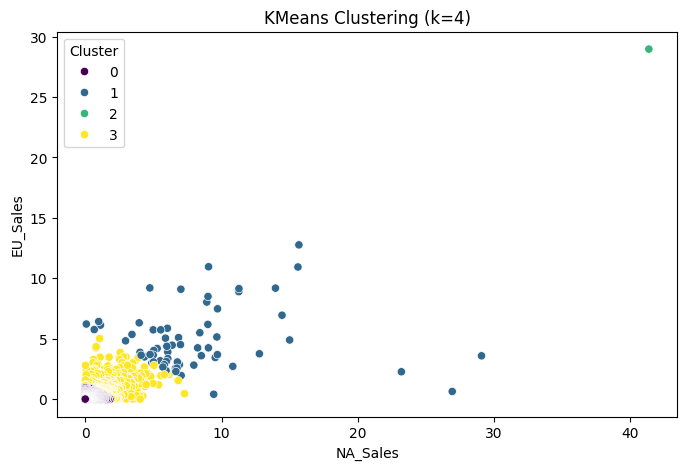

In [44]:
def kmeans_clusters(df, feature_names, n_clusters):
    # Extract and scale the features for clustering
    x = df[feature_names]
    scaler = StandardScaler()
    x_scaled = scaler.fit_transform(x)

    # Apply KMeans clustering
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(x_scaled)
    cluster_labels_pred = kmeans.predict(x_scaled)

    # Calculate Davies-Bouldin and Silhouette scores
    db_score = davies_bouldin_score(x_scaled, cluster_labels_pred)
    s_score = silhouette_score(x_scaled, cluster_labels_pred)

    # Print the evaluation metrics
    print(f"Davies-Bouldin Score: {db_score}")
    print(f"Silhouette Score: {s_score}")

    # Create a scatter plot of the clusters based on NA_Sales and EU_Sales
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x=feature_names[0], y=feature_names[1], hue=cluster_labels_pred, palette="viridis", marker='o')
    plt.title(f"KMeans Clustering (k={n_clusters})")
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend(title="Cluster", loc="best")
    plt.show()

    return db_score, s_score, cluster_labels_pred

# NA_Sales and EU_Sales as the best combination of features
feature_names = ['NA_Sales', 'EU_Sales'] 
# The optimal number of clusters, obtained from the elbow method
n_clusters = 4 

# Call the function to plot clusters
db_score, s_score, cluster_labels_pred = kmeans_clusters(df, feature_names, n_clusters)


#### 1g DBSCAN

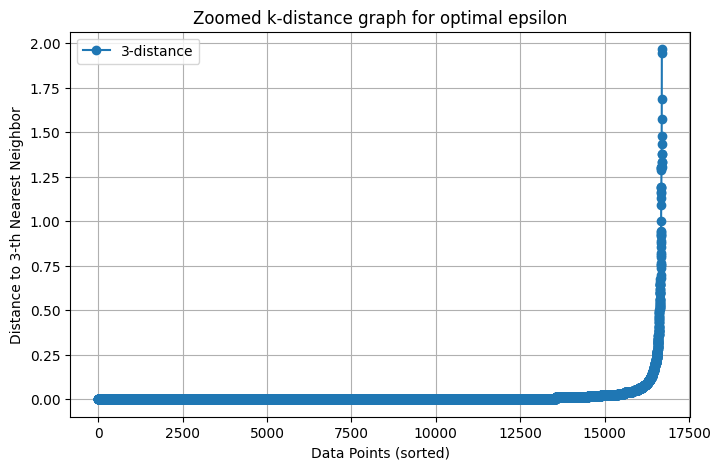

In [45]:
numerical_features = ['NA_Sales', 'EU_Sales']
x = df[numerical_features]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

def find_optimal_eps_zoomed(x_scaled, zoom_limit, min_samples):
    # Compute the k-nearest neighbors distances
    neighbors = NearestNeighbors(n_neighbors=min_samples)
    neighbors_fit = neighbors.fit(x_scaled)
    distances, _ = neighbors.kneighbors(x_scaled)

    # Sort distances in ascending order
    distances = np.sort(distances[:, -1])
    
    # Filter distances below the zoom_limit (e.g., 2.0)
    filtered_distances = distances[distances < zoom_limit]
    
    # Plot the k-distance graph for the filtered distances
    plt.figure(figsize=(8, 5))
    plt.plot(range(len(filtered_distances)), filtered_distances, marker="o", label=f"{min_samples}-distance")
    plt.title("Zoomed k-distance graph for optimal epsilon")
    plt.xlabel("Data Points (sorted)")
    plt.ylabel(f"Distance to {min_samples}-th Nearest Neighbor")
    plt.grid()
    plt.legend()
    plt.show()

# Call the function with a zoom limit(zoom the graph to get precise eps value)
#min_samples = dimensionality(NA_Sales, EU_Sales) + 1
find_optimal_eps_zoomed(x_scaled, min_samples=3, zoom_limit=2.0) 


Davies-Bouldin Score: 1.2986988958682448
Silhouette Score: 0.8109133531143898


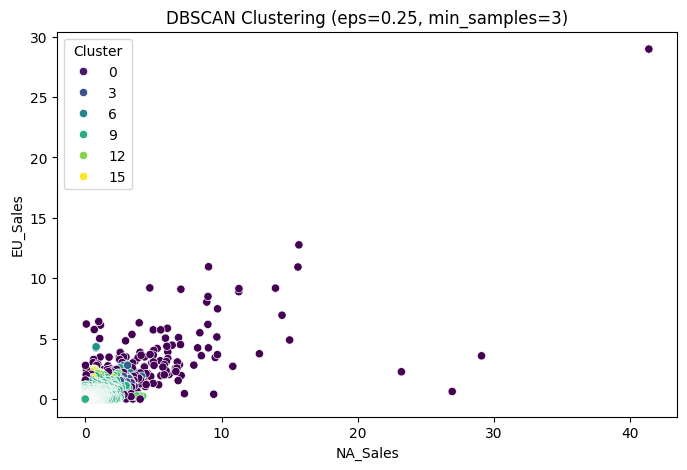

In [46]:
numerical_features = ['NA_Sales', 'EU_Sales']
x = df[numerical_features]
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
def perform_dbscan_clustering(df, x_scaled, eps, min_samples):
    # Apply DBSCAN clustering
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    dbscan_labels_pred = dbscan.fit_predict(x_scaled)

    # Evaluate clustering performance
    db_score = davies_bouldin_score(x_scaled, dbscan_labels_pred)
    s_score = silhouette_score(x_scaled, dbscan_labels_pred)

    # Print evaluation metrics
    print(f"Davies-Bouldin Score: {db_score}")
    print(f"Silhouette Score: {s_score}")

    # Plot the clusters
    plt.figure(figsize=(8, 5))
    sns.scatterplot(data=df, x='NA_Sales', y='EU_Sales', hue=dbscan_labels_pred, palette='viridis')
    plt.title(f"DBSCAN Clustering (eps={eps}, min_samples={min_samples})")
    plt.xlabel('NA_Sales')
    plt.ylabel('EU_Sales')
    plt.legend(title="Cluster", loc="best")
    plt.show()

    return db_score, s_score

# Example usage of the function
db_score, s_score = perform_dbscan_clustering(df, x_scaled, eps=0.25, min_samples=3)
